Importing the required library, pandas is for dataframe management. jupier is the module which contains the class and methods.

In [1]:
import pandas as pd
from jupiter import Moon
#defining the database form and name.
database_service = "sqlite"
database = "jupiter.db"
connectable = f"{database_service}:///{database}"
query = "SELECT * FROM moons"
#define vairable files to store the dataframe temporarily
files = pd.read_sql(query,connectable)


Display the frist few rows to see what the dataset contains.

In [2]:
files.head()

,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
0,Adrastea,0.298,129000.0,8.2,NaN,NaN,Inner,0.001500,0.03
1,Aitne,730.000,23231000.0,1.5,22.7,NaN,Carme,0.264000,165.00
2,Amalthea,0.498,181400.0,83.5,14.1,2.080000e+18,Inner,0.003190,0.37
3,Ananke,630.000,21300000.0,14.0,18.9,NaN,Ananke,0.174725,148.60
4,Aoede,761.000,24000000.0,2.0,22.5,NaN,Pasiphae,0.432000,158.00


Define variable moons as self-defined class Moon, and reset the index to the name of each moon. 

In [3]:
moons = Moon(files.set_index("moon"),files.set_index("moon"))
moons.data.head()

,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
moon,,,,,,,,
Adrastea,0.298,129000.0,8.2,NaN,NaN,Inner,0.001500,0.03
Aitne,730.000,23231000.0,1.5,22.7,NaN,Carme,0.264000,165.00
Amalthea,0.498,181400.0,83.5,14.1,2.080000e+18,Inner,0.003190,0.37
Ananke,630.000,21300000.0,14.0,18.9,NaN,Ananke,0.174725,148.60
Aoede,761.000,24000000.0,2.0,22.5,NaN,Pasiphae,0.432000,158.00


Two methods are shown below. Moon.locate("name of moon") gives all data of the input moon, Moon.locate_singal("name of moon","specific data") gives the specific data of chosen moon.

In [4]:
print(moons.locate("Adrastea"),"\n")
print(moons.locate_singal("Adrastea","period_days"))

period_days           0.298
distance_km        129000.0
radius_km               8.2
mag                     NaN
mass_kg                 NaN
group                 Inner
ecc                  0.0015
inclination_deg        0.03
Name: Adrastea, dtype: object 

0.298


Noticing that the mass data for moons seem to be incorrect, using Moon.drop("column name") to erase the whole column from the datraset. 

In [5]:
moons.drop("mass_kg")
moons.data.head()

,period_days,distance_km,radius_km,mag,group,ecc,inclination_deg
moon,,,,,,,
Adrastea,0.298,129000.0,8.2,NaN,Inner,0.001500,0.03
Aitne,730.000,23231000.0,1.5,22.7,Carme,0.264000,165.00
Amalthea,0.498,181400.0,83.5,14.1,Inner,0.003190,0.37
Ananke,630.000,21300000.0,14.0,18.9,Ananke,0.174725,148.60
Aoede,761.000,24000000.0,2.0,22.5,Pasiphae,0.432000,158.00


Moon.columns() returns a list of column names.

In [6]:
print(moons.columns())

['period_days', 'distance_km', 'radius_km', 'mag', 'group', 'ecc', 'inclination_deg']


Moon.means("column name") returns the mean of given column. Moons.std("column name") returns the stdandard deviation of given column.

In [7]:
moons.means("period_days")

mean of period_days is 525.9981464178571


525.9981464178571

In [8]:
moons.std("period_days")

standard deviation of period_days is 272.6702433032667


Moon.mean_groupby("column name") returns the mean of columns for specific group. Moons.std_groupby("column name") returns the stdandard deviation of columns for specific group.

In [9]:
moons.mean_groupby("group")

,period_days,distance_km,radius_km,mag,ecc,inclination_deg
group,,,,,,
Ananke,616.076923,2.097923e+07,2.653846,22.330769,0.233728,148.922308
Carme,721.642857,2.329515e+07,3.275000,22.450000,0.240148,164.800000
Galilean,7.285050,1.011425e+06,2106.700000,5.142500,0.005450,2.052500
Hamilia,258.000000,1.170071e+07,21.000000,18.200000,0.147873,26.300000
Himalia,256.666667,1.156897e+07,23.458333,19.950000,0.166636,29.151667
Inner,0.439000,1.650722e+05,40.550000,14.100000,0.005598,0.875000
Pasiphae,744.083333,2.377494e+07,5.433333,21.750000,0.350750,150.600000
other,293.000000,1.219256e+07,3.000000,22.000000,0.341106,48.350000


In [10]:
moons.std_groupby("group")

,period_days,distance_km,radius_km,mag,ecc,inclination_deg
group,,,,,,
Ananke,23.070405,5.461083e+05,3.490371,1.235843,0.089683,2.200296
Carme,29.684513,5.821236e+05,5.819819,1.143376,0.040291,1.056846
Galilean,6.659114,6.393567e+05,499.870830,0.438891,0.003438,0.194487
Hamilia,NaN,NaN,NaN,NaN,NaN,NaN
Himalia,15.870308,3.163477e+05,33.607446,3.575332,0.041139,1.338961
Inner,0.181589,4.535158e+04,33.294294,NaN,0.008029,0.872792
Pasiphae,26.956053,6.165425e+05,8.716477,2.112947,0.100519,5.087596
other,230.516811,6.783183e+06,2.121320,1.414214,0.125716,4.313351


Moon.corr("column name","column name") returns the correlationship between two columns and plot a graph of these two columns.

correlation factor bewteen period_days and ecc is 0.7371813498992648


/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


0.7371813498992648

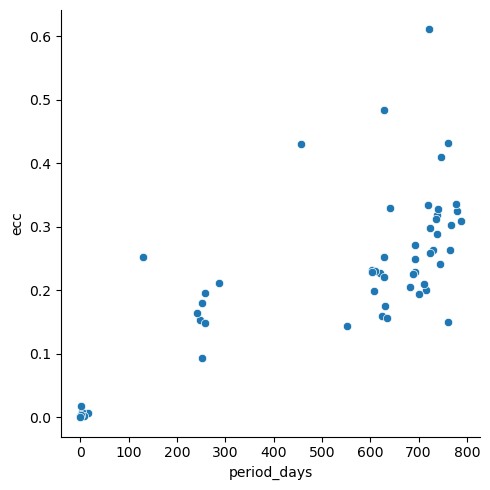

In [11]:
moons.corr("period_days","ecc")

Moon.corr_all() returns the correlationship between all columns and plot a heatmap.

,period_days,distance_km,radius_km,mag,ecc,inclination_deg
period_days,1.000000,0.991521,-0.534434,0.742646,0.737181,0.969493
distance_km,0.991521,1.000000,-0.567266,0.799187,0.750819,0.953873
radius_km,-0.534434,-0.567266,1.000000,-0.887393,-0.478901,-0.487645
mag,0.742646,0.799187,-0.887393,1.000000,0.554617,0.688529
ecc,0.737181,0.750819,-0.478901,0.554617,1.000000,0.645961
inclination_deg,0.969493,0.953873,-0.487645,0.688529,0.645961,1.000000


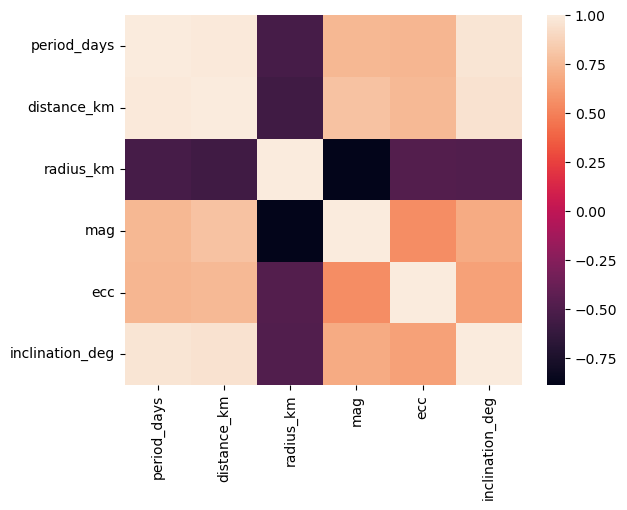

In [13]:
moons.corr_all()